### Student Information
Name: 黃景鴻

Student ID: 111033638

GitHub ID: Jinghong107

---

### Instructions

1. First: do the **take home** exercises in the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/keziatamus/DM2022-Lab1-Homework/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 20th 11:59 pm, Thursday)__. 

---

### First part

In [1]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

In [2]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)

In [3]:
# Converting Dictionary into Pandas Dataframe
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

In [4]:
# Adding Columns
# add category to the dataframe
X['category'] = twenty_train.target
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

### >>> Exercise 2 (take home):
Experiment with other querying techniques using pandas dataframes.

In [5]:
# answer here
# print the top 10 rows, steps = 2
print(X.loc[::2, 'text'][:10], end='\n')

# print the last 10 rows
print(X.iloc[::-1, 0][:10], end='\n') 

# print the row whose category = 3
print(X.loc[X['category'] == 3], end='\n')

# print the top 10 rows
print(X['text'].head(10)) 

# print the 2 rows that contain the name Kyle
X[(X['text'].str.contains("Kyle"))][:2]

0     From: sd345@city.ac.uk (Michael Collier) Subje...
2     From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...
4     From: stanly@grok11.columbiasc.ncr.com (stanly...
6     From: jodfishe@silver.ucs.indiana.edu (joseph ...
8     From: geb@cs.pitt.edu (Gordon Banks) Subject: ...
10    From: anasaz!karl@anasazi.com (Karl Dussik) Su...
12    From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Ro...
14    From: sloan@cis.uab.edu (Kenneth Sloan) Subjec...
16    From: texx@ossi.com (Robert "Texx" Woodworth) ...
18    From: tom_milligan@rainbow.mentorg.com Subject...
Name: text, dtype: object
2256    From: dyer@spdcc.com (Steve Dyer) Subject: Re:...
2255    From: Dan Wallach <dwallach@cs.berkeley.edu> S...
2254    From: sasghm@theseus.unx.sas.com (Gary Merrill...
2253    From: mhollowa@ic.sunysb.edu (Michael Holloway...
2252    From: roos@Operoni.Helsinki.FI (Christophe Roo...
2251    From: Mark-Tarbell@suite.com Subject: Amniocen...
2250    From: ingles@engin.umich.edu (Ray Ingles) Subj...
2249    

,text,category,category_name
56,From: kaminski@netcom.com (Peter Kaminski) Sub...,2,sci.med
2095,From: nigel.allen@canrem.com (Nigel Allen) Sub...,3,soc.religion.christian


--   
\--

### >>> Exercise 5 (take home):
Please check the data and the process below, describe what you observe and why it happened.

In [6]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
print(NA_df, end='\n\n')
print(NA_df['missing_example'].isnull())

  id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F                

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool


##### // answer here
In function `.isnull()`, NA values, such as `'None'`, `None` or `numpy.NaN`, get mapped to True values.  
   
Everything else gets mapped to False values. Characters such as empty strings `''` or `'numpy.inf'` are not considered NA values. That is why `.isnull()` didn't work here.

--   
\--

### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [7]:
# answer here
# create a duplicate of X, and nothing will affect the original X
A = X.copy(deep=True)
# sampling
B = A.sample(100)
# concat A and X, drop duplicates to see what is the difference between them
diff = pd.concat([A, X]).drop_duplicates(keep=False)
print(diff, end='\n')
print(B)

Empty DataFrame
Columns: [text, category, category_name]
Index: []
                                                   text  category  \
2213  From: tas@pegasus.com (Len Howard) Subject: Re...         2   
410   From: jer@prefect.cc.bellcore.com (rathmann,ja...         2   
916   From: amann@iam.unibe.ch (Stephan Amann) Subje...         1   
518   From: sdr@llnl.gov (Dakota) Subject: Re: HELP ...         2   
111   From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
...                                                 ...       ...   
2075  From: db7n+@andrew.cmu.edu (D. Andrew Byler) S...         3   
1665  From: shavlik@cs.wisc.edu (Jude Shavlik) Subje...         2   
643   From: db7n+@andrew.cmu.edu (D. Andrew Byler) S...         3   
192   From: maridai@comm.mot.com (Marida Ignacio) Su...         3   
829   From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   

               category_name  
2213                 sci.med  
410                  sci.med  
916        

#### // Report here  
I use `.copy()` function copying `'X'` to `'A'` and set coefficient `'deep'` True, which means that any changes of `A` will not affect the original `X`, then sampling `A`.  

The result shows that there is not a difference between the dataframe `A` and the original `X`.  
It seems that the only thing changed is the original order from X, which we can know from the sample `B`.

--   
\--


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

### >>> Exercise 8 (take home):
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an exercise. Below we show you an snapshot of the type of chart we are looking for.

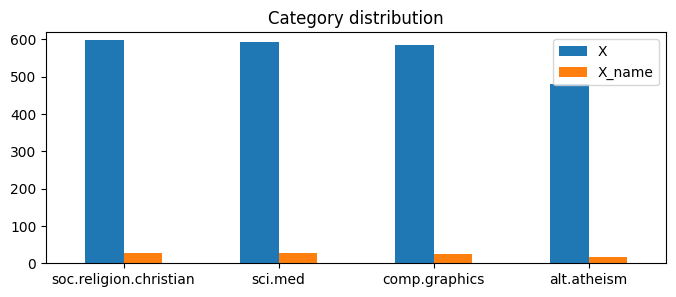

In [9]:
# answer here
# first concat two datasets
df_plot = pd.concat([X.category_name.value_counts(), B.category_name.value_counts()],
                     axis = 1, sort = False)
# settle down the columns name
df_plot.columns = ["X", "X_name"]
# settle down the details of the plot
df_plot.plot(kind = "bar",
             title = "Category distribution",
             ylim = [0, max(X.category_name.value_counts()) + 20],
             figsize=(8,3),
             rot = 0)

plt.show()

--   
\--

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) # learn the vocabulary and return document-term matrix
# count_vect.get_feature_names_out()  # 列表形式呈现文章生成的词典
# count_vect.vocabulary_  # 字典形式呈现，key：词，value:词频
print(X_counts) # (m, n) k：m為X.text中index=m之項(第m行)
                # n代表get_feature_names_out()生成的陣列中的index=n的詞
                # k為詞頻
# X_counts.toarray()  # 將結果轉為稀疏矩陣
# X_counts.toarray().sum(axis=0)   # 每個詞在所有文檔中(text的第1~最後一項)的詞頻  

  (0, 14887)	1
  (0, 29022)	1
  (0, 8696)	4
  (0, 4017)	2
  (0, 33256)	2
  (0, 21661)	3
  (0, 9031)	3
  (0, 31077)	1
  (0, 9805)	2
  (0, 17366)	1
  (0, 32493)	4
  (0, 16916)	2
  (0, 19780)	2
  (0, 17302)	2
  (0, 23122)	1
  (0, 25663)	1
  (0, 16881)	1
  (0, 16082)	1
  (0, 23915)	1
  (0, 32142)	5
  (0, 33597)	2
  (0, 20253)	1
  (0, 587)	1
  (0, 12051)	1
  (0, 5201)	1
  :	:
  (2256, 13740)	1
  (2256, 14662)	1
  (2256, 20201)	1
  (2256, 12443)	6
  (2256, 30325)	3
  (2256, 4610)	1
  (2256, 33844)	1
  (2256, 17354)	1
  (2256, 26998)	1
  (2256, 20277)	1
  (2256, 20695)	1
  (2256, 20702)	1
  (2256, 9649)	1
  (2256, 9086)	1
  (2256, 26254)	1
  (2256, 17133)	2
  (2256, 4490)	1
  (2256, 13720)	1
  (2256, 5016)	1
  (2256, 9632)	1
  (2256, 11824)	1
  (2256, 29993)	1
  (2256, 1298)	1
  (2256, 2375)	1
  (2256, 3921)	1


### >>> Exercise 10 (take home):
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulaty. Try to do this as efficient as possible.

In [11]:
# answer here
index = 0
# find another 1 in the fifth record
for i in range(100):
    if X_counts[4,i] == 1: index = i
print(count_vect.get_feature_names_out()[index])

01


--  
\--

### >>> Exercise 11 (take home):
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frquency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an exercise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocabulary. Report below what methods you would use to get a nice and useful visualization.

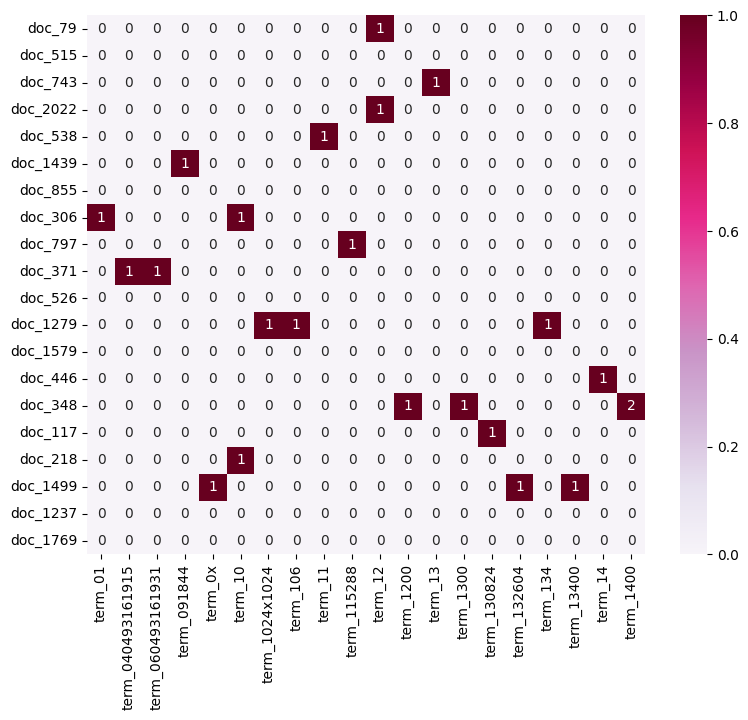

In [12]:
# Answer here
from random import sample
import seaborn as sns

# create a new sample of X and a count vectorizer of its text
smp_count_vect = CountVectorizer()
X_sample = X.sample(20)
X_sample_counts = smp_count_vect.fit_transform(X_sample.text)

# settle down the x, y, z
plot_x_samples = ["term_" + str(i) for i in smp_count_vect.get_feature_names_out()[:20]]
plot_y_samples = ["doc_" + str(i) for i in list(X_sample.index)]
plot_z_samples = X_sample_counts[:20,:20].toarray()

# plot
smp_plot = pd.DataFrame(plot_z_samples, columns = plot_x_samples, index = plot_y_samples)
plt.subplots(figsize=(9, 7))
smp_plot = sns.heatmap(smp_plot,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

--  
\--

In [13]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result using 3-D plot. Use at least 3 different angle(camera position) to check your result and describe what you found.

C:\Users\User\AppData\Local\Temp\ipykernel_18192\1987277161.py:8: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


Text(0.5, 0, '\nZ Label')

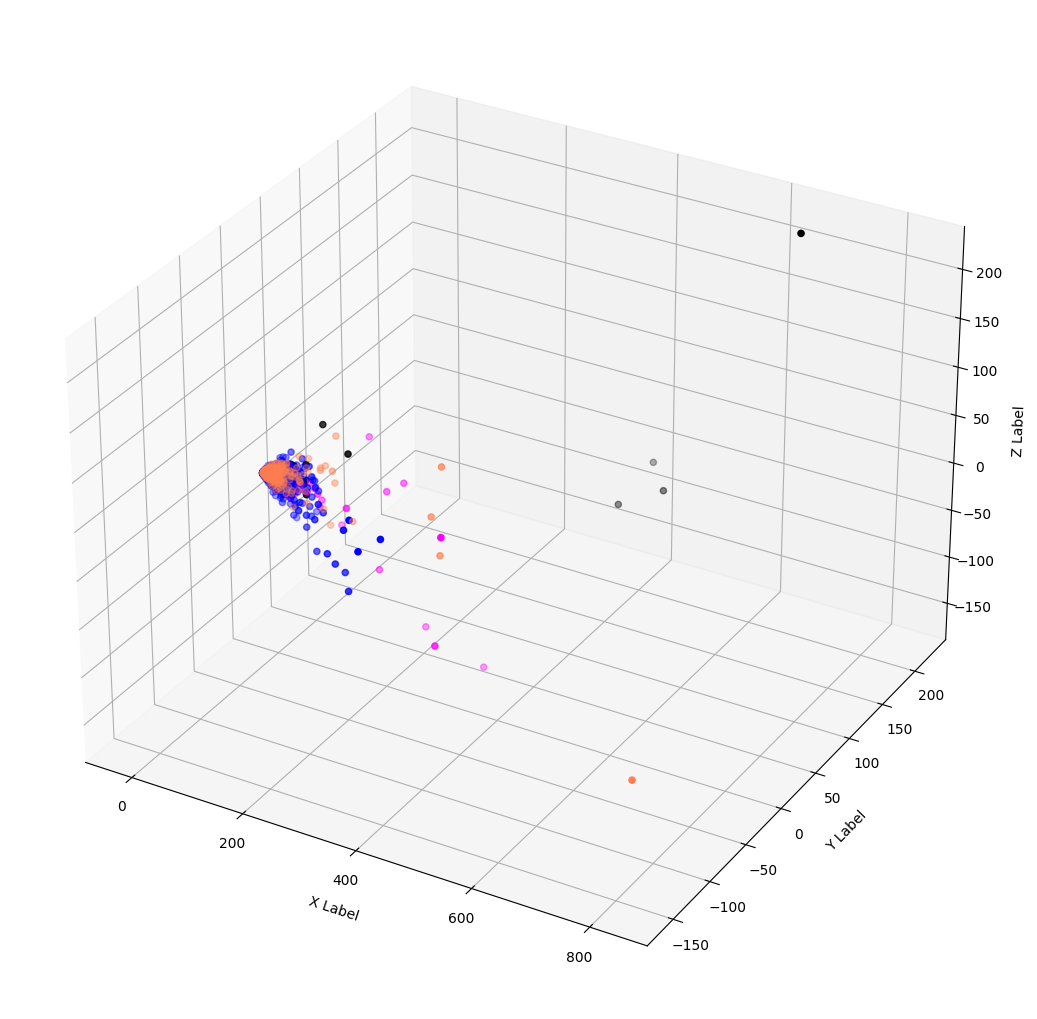

In [14]:
# Answer here
X_reduced_3 = PCA(n_components = 3).fit_transform(X_counts.toarray())
col = ['coral', 'blue', 'black', 'magenta']

# plot
# angle 1
fig = plt.figure(figsize = (25,10))
ax = Axes3D(fig)
for c, category in zip(col, categories):
    # c means color
    # filter the category
    # T transpose and pick up x, y, z points
    xs = X_reduced_3[X['category_name'] == category].T[0]
    ys = X_reduced_3[X['category_name'] == category].T[1]
    zs = X_reduced_3[X['category_name'] == category].T[2]
   
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

C:\Users\User\AppData\Local\Temp\ipykernel_18192\1911513634.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


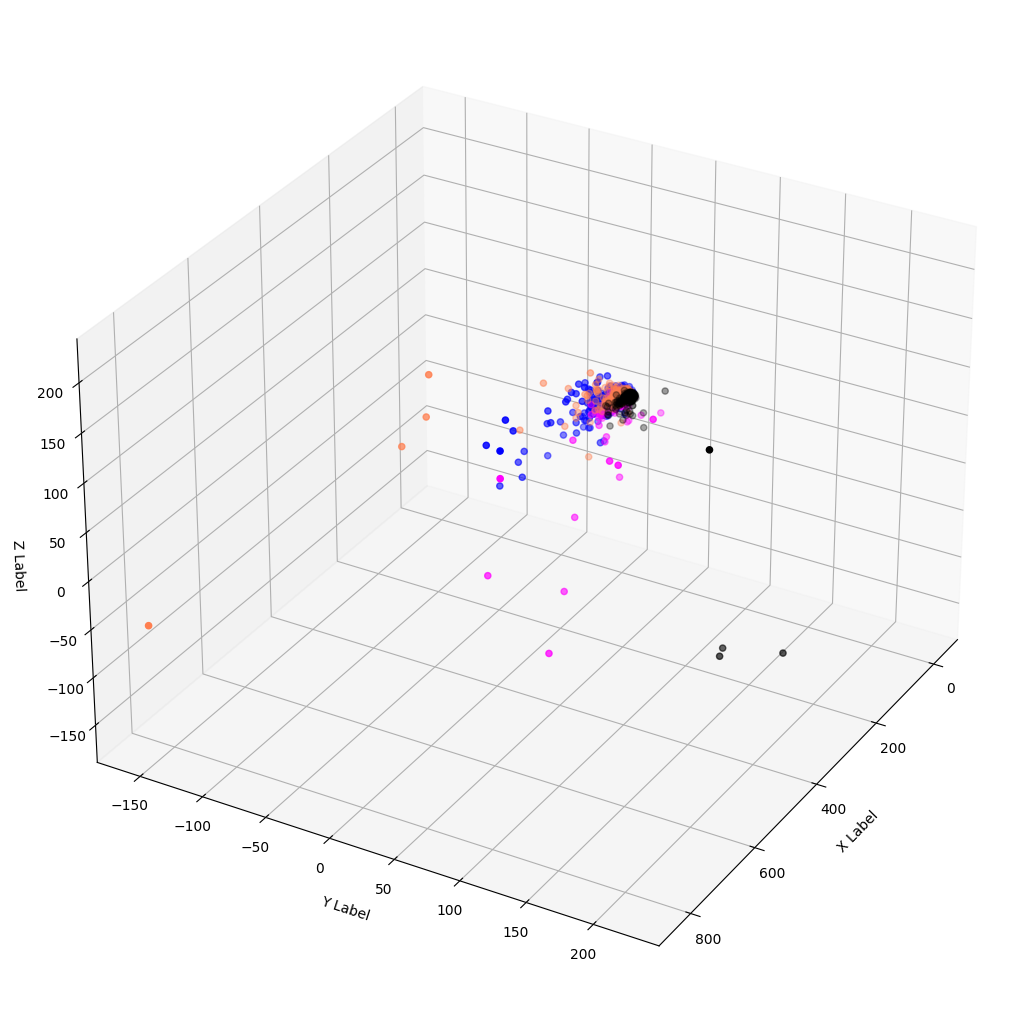

In [15]:
# plot
# angle 2
fig = plt.figure(figsize = (25,10))
ax = Axes3D(fig)
for c, category in zip(col, categories):
    # c means color
    # filter the category
    # T transpose and pick up x, y, z points
    xs = X_reduced_3[X['category_name'] == category].T[0]
    ys = X_reduced_3[X['category_name'] == category].T[1]
    zs = X_reduced_3[X['category_name'] == category].T[2]
   
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
ax.view_init(30, 30)

C:\Users\User\AppData\Local\Temp\ipykernel_18192\591246091.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


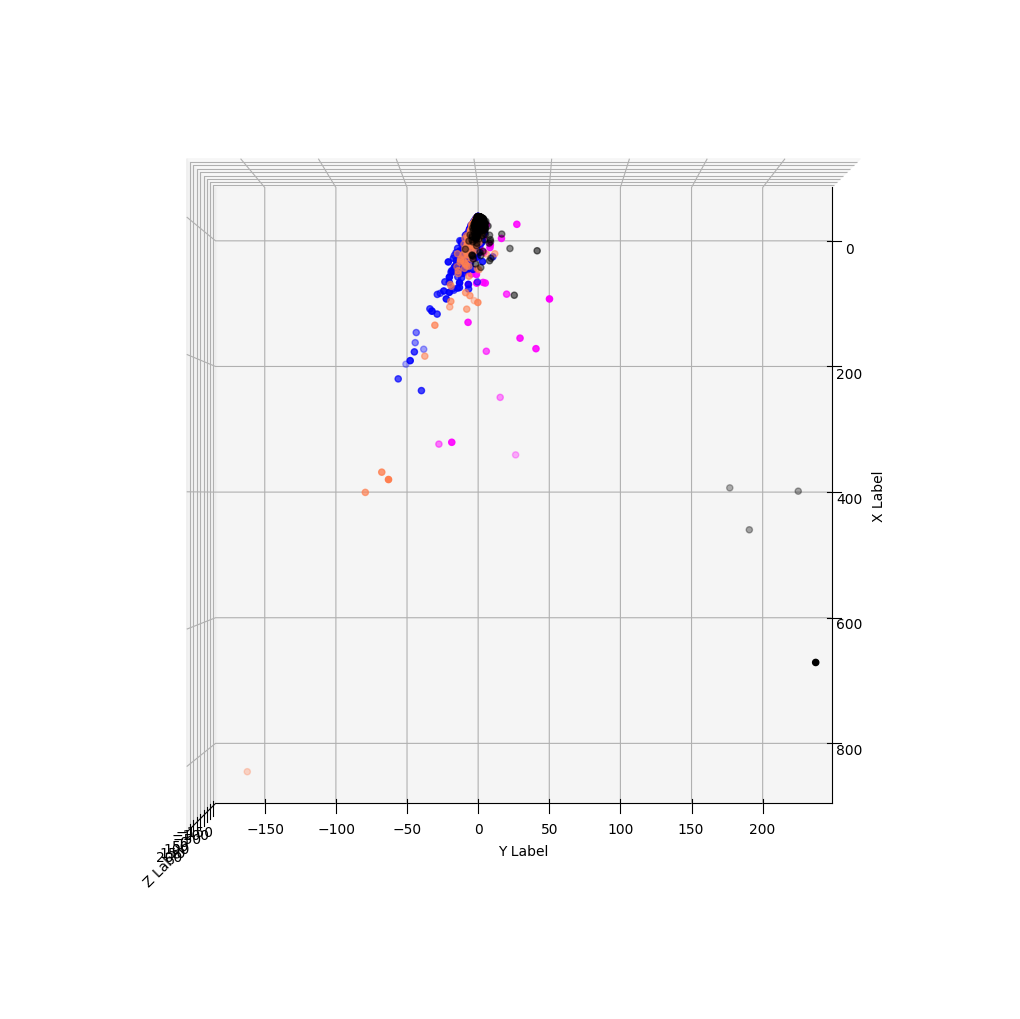

In [16]:
# plot
# angle 3
fig = plt.figure(figsize = (25,10))
ax = Axes3D(fig)
for c, category in zip(col, categories):
    # c means color
    # filter the category
    # T transpose and pick up x, y, z points
    xs = X_reduced_3[X['category_name'] == category].T[0]
    ys = X_reduced_3[X['category_name'] == category].T[1]
    zs = X_reduced_3[X['category_name'] == category].T[2]
   
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
ax.view_init(90, 0)

--  
\--

In [17]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0, X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

import numpy as np
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

### >>> Exercise 13 (take home):
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [19]:
# Answer here
import plotly.express as px
px.bar(x=count_vect.get_feature_names()[:300], y=term_frequencies[:300])



c:\development\idle_manager\Anaconda3\envs\default\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'x=%{x}<br>y=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '',
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['00', '000', '0000', ..., '103237', '10368', '1039'], dtype=object),
              'xaxis': 'x',
              'y': array([134,  92,   1, ...,   3,   1,   1], dtype=int64),
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'x'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'y'}}}
})

--  
\--

### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 

In [ ]:
# Answer here
# reduce number to 25 to see clearer
px.bar(x=count_vect.get_feature_names()[500:525], y=term_frequencies[500:525], labels={'x':'Feature names', 'y':'Frequencies'}, title="Top 20 most frequently appearing features")

c:\Users\user\.conda\envs\default\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



--  
\--

### >>> Exercise 15 (take home):
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [ ]:
# Answer here

long_tail_df = pd.DataFrame(
    list(zip(count_vect.get_feature_names(), list(term_frequencies))),
    columns=["term_name", "term_frequencies"]
)
long_tail_df.sort_values(by=["term_frequencies"], ascending=False, inplace=True)
px.bar(long_tail_df[:100], x="term_name", y="term_frequencies")

c:\Users\user\.conda\envs\default\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



--  
\--

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [ ]:
# Answer here
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb2 = preprocessing.LabelBinarizer()
mlb2.fit(X.category_name)
X['bin_category2'] = mlb2.transform(X['category_name']).tolist()
X

# Yes, it works! #

,text,category,category_name,bin_category2
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[0, 0, 0, 1]"
...,...,...,...,...
2252,From: roos@Operoni.Helsinki.FI (Christophe Roo...,2,sci.med,"[0, 0, 1, 0]"
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2,sci.med,"[0, 0, 1, 0]"
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,sci.med,"[0, 0, 1, 0]"
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,2,sci.med,"[0, 0, 1, 0]"


---

### Second part

#### 1. Data Preparation

In [ ]:
# read in data
amazon_data = pd.read_csv("sentiment labelled sentences/amazon_cells_labelled.txt", sep="\t", names=["sentence", "score"])
yelp_data = pd.read_csv("sentiment labelled sentences/yelp_labelled.txt", sep="\t", names=["sentence", "score"])
imdb_data = pd.read_csv("sentiment labelled sentences/imdb_labelled.txt", sep="\t", names=["sentence", "score"])

In [ ]:
# add catgory_names and category number for the three dataframes
# 0 for amazon, 1 for yelp & 2 for imdb
amazon_data = amazon_data.assign(label = '', category_name = "amazon", category = 0)
yelp_data = yelp_data.assign(label = '', category_name = "yelp", category = 1)
imdb_data = imdb_data.assign(label = '', category_name = "imdb", category = 2)

In [ ]:
# concate three dataframes into one
# sentiment = amazon_data.append(yelp_data).append(imdb_data)
sentiment = pd.concat([amazon_data, yelp_data, imdb_data],
                     axis = 0, sort = False)
#--- now the sentiment is concated but the index is from the original 3 dataframe ---

# re-index
sentiment.reset_index(drop=True, inplace=True) # drop the original index
sentiment

,sentence,score,label,category_name,category
0,So there is no way for me to plug it in here i...,0,,amazon,0
1,"Good case, Excellent value.",1,,amazon,0
2,Great for the jawbone.,1,,amazon,0
3,Tied to charger for conversations lasting more...,0,,amazon,0
4,The mic is great.,1,,amazon,0
...,...,...,...,...,...
2743,I just got bored watching Jessice Lange take h...,0,,imdb,2
2744,"Unfortunately, any virtue in this film's produ...",0,,imdb,2
2745,"In a word, it is embarrassing.",0,,imdb,2
2746,Exceptionally bad!,0,,imdb,2


In [ ]:
for i in range(len(sentiment)):
    if sentiment.score[i] == 0:
        sentiment.label[i] = 'negative'
    else:
        sentiment.label[i] = 'positive'
sentiment

C:\Users\user\AppData\Local\Temp\ipykernel_18980\3159716309.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\user\AppData\Local\Temp\ipykernel_18980\3159716309.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,sentence,score,label,category_name,category
0,So there is no way for me to plug it in here i...,0,negative,amazon,0
1,"Good case, Excellent value.",1,positive,amazon,0
2,Great for the jawbone.,1,positive,amazon,0
3,Tied to charger for conversations lasting more...,0,negative,amazon,0
4,The mic is great.,1,positive,amazon,0
...,...,...,...,...,...
2743,I just got bored watching Jessice Lange take h...,0,negative,imdb,2
2744,"Unfortunately, any virtue in this film's produ...",0,negative,imdb,2
2745,"In a word, it is embarrassing.",0,negative,imdb,2
2746,Exceptionally bad!,0,negative,imdb,2


#### 2. Getting familiar with the data 

In [ ]:
sentiment

,sentence,score,label,category_name,category
0,So there is no way for me to plug it in here i...,0,negative,amazon,0
1,"Good case, Excellent value.",1,positive,amazon,0
2,Great for the jawbone.,1,positive,amazon,0
3,Tied to charger for conversations lasting more...,0,negative,amazon,0
4,The mic is great.,1,positive,amazon,0
...,...,...,...,...,...
2743,I just got bored watching Jessice Lange take h...,0,negative,imdb,2
2744,"Unfortunately, any virtue in this film's produ...",0,negative,imdb,2
2745,"In a word, it is embarrassing.",0,negative,imdb,2
2746,Exceptionally bad!,0,negative,imdb,2


In [ ]:
sentiment[0:10]

,sentence,score,label,category_name,category
0,So there is no way for me to plug it in here i...,0,negative,amazon,0
1,"Good case, Excellent value.",1,positive,amazon,0
2,Great for the jawbone.,1,positive,amazon,0
3,Tied to charger for conversations lasting more...,0,negative,amazon,0
4,The mic is great.,1,positive,amazon,0
5,I have to jiggle the plug to get it to line up...,0,negative,amazon,0
6,If you have several dozen or several hundred c...,0,negative,amazon,0
7,If you are Razr owner...you must have this!,1,positive,amazon,0
8,"Needless to say, I wasted my money.",0,negative,amazon,0
9,What a waste of money and time!.,0,negative,amazon,0


In [ ]:
sentiment[:-20]

,sentence,score,label,category_name,category
0,So there is no way for me to plug it in here i...,0,negative,amazon,0
1,"Good case, Excellent value.",1,positive,amazon,0
2,Great for the jawbone.,1,positive,amazon,0
3,Tied to charger for conversations lasting more...,0,negative,amazon,0
4,The mic is great.,1,positive,amazon,0
...,...,...,...,...,...
2723,"Still, it makes up for all of this with a supe...",1,positive,imdb,2
2724,"Just consider the excellent story, solid actin...",1,positive,imdb,2
2725,"Instead, we got a bore fest about a whiny, spo...",0,negative,imdb,2
2726,Then I watched it again two Sundays ago (March...,1,positive,imdb,2


In [ ]:
# querying by using .loc() & .iloc()
sentiment.loc[::10, 'sentence'][0:10]

0     So there is no way for me to plug it in here i...
10                      And the sound quality is great.
20    I went on Motorola's website and followed all ...
30    This is a simple little phone to use, but the ...
40    It has a great camera thats 2MP, and the pics ...
50    Not loud enough and doesn't turn on like it sh...
60    Essentially you can forget Microsoft's tech su...
70                                    Mic Doesn't work.
80        I wear it everyday and it holds up very well.
90    For a product that costs as much as this one d...
Name: sentence, dtype: object

In [ ]:
sentiment.iloc[::10,0:1][0:10]

,sentence
0,So there is no way for me to plug it in here i...
10,And the sound quality is great.
20,I went on Motorola's website and followed all ...
30,"This is a simple little phone to use, but the ..."
40,"It has a great camera thats 2MP, and the pics ..."
50,Not loud enough and doesn't turn on like it sh...
60,Essentially you can forget Microsoft's tech su...
70,Mic Doesn't work.
80,I wear it everyday and it holds up very well.
90,For a product that costs as much as this one d...


In [ ]:
# standard query
sentiment[::10][0:10]

,sentence,score,label,category_name,category
0,So there is no way for me to plug it in here i...,0,negative,amazon,0
10,And the sound quality is great.,1,positive,amazon,0
20,I went on Motorola's website and followed all ...,0,negative,amazon,0
30,"This is a simple little phone to use, but the ...",0,negative,amazon,0
40,"It has a great camera thats 2MP, and the pics ...",1,positive,amazon,0
50,Not loud enough and doesn't turn on like it sh...,0,negative,amazon,0
60,Essentially you can forget Microsoft's tech su...,0,negative,amazon,0
70,Mic Doesn't work.,0,negative,amazon,0
80,I wear it everyday and it holds up very well.,1,positive,amazon,0
90,For a product that costs as much as this one d...,0,negative,amazon,0


### 3. Null values

In [ ]:
sentiment.isnull()

,sentence,score,label,category_name,category
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
2743,False,False,False,False,False
2744,False,False,False,False,False
2745,False,False,False,False,False
2746,False,False,False,False,False


In [ ]:
# check missing values
sentiment.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2743    (The amoung of missing records is: , 0)
2744    (The amoung of missing records is: , 0)
2745    (The amoung of missing records is: , 0)
2746    (The amoung of missing records is: , 0)
2747    (The amoung of missing records is: , 0)
Length: 2748, dtype: object

#### 4. Duplicated values

In [ ]:
# checking the duplicated word
sentiment.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2743    False
2744    False
2745    False
2746    False
2747    False
Length: 2748, dtype: bool

In [ ]:
sum(sentiment.duplicated())

17

In [ ]:
sentiment.drop_duplicates(keep=False, inplace=True)
len(sentiment)

2714

In [ ]:
# To see the last some rows 
sentiment.tail()

,sentence,score,label,category_name,category
2743,I just got bored watching Jessice Lange take h...,0,negative,imdb,2
2744,"Unfortunately, any virtue in this film's produ...",0,negative,imdb,2
2745,"In a word, it is embarrassing.",0,negative,imdb,2
2746,Exceptionally bad!,0,negative,imdb,2
2747,All in all its an insult to one's intelligence...,0,negative,imdb,2


In [ ]:
# Adjusting the index
sentiment.reset_index(drop=True, inplace=True)
sentiment.tail()

,sentence,score,label,category_name,category
2709,I just got bored watching Jessice Lange take h...,0,negative,imdb,2
2710,"Unfortunately, any virtue in this film's produ...",0,negative,imdb,2
2711,"In a word, it is embarrassing.",0,negative,imdb,2
2712,Exceptionally bad!,0,negative,imdb,2
2713,All in all its an insult to one's intelligence...,0,negative,imdb,2


#### 5. Sampling

In [ ]:
sentiment_smp = sentiment.sample(n=1000)
sentiment_smp[0:4]

,sentence,score,label,category_name,category
2607,He surely doesn't know how to make a coherent ...,0,negative,imdb,2
1865,Worst Thai ever.,0,negative,yelp,1
924,I does not maintain a connection with the comp...,0,negative,amazon,0
962,don't waste your money.,0,negative,amazon,0


<AxesSubplot:title={'center':'Category distribution'}>

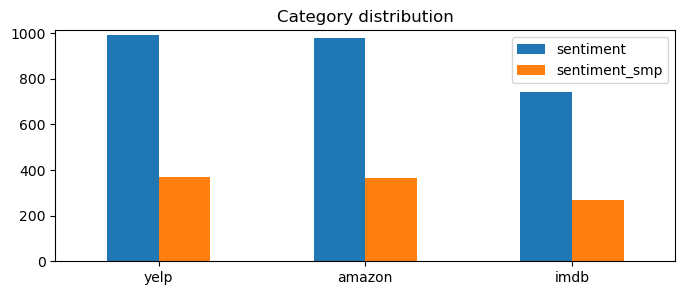

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

ubound = max(sentiment.category_name.value_counts()) + 20
ubound_smp = max(sentiment_smp.category_name.value_counts()) + 20
ub = ubound_smp

if ubound > ubound_smp:
    ub = ubound

# concat both Dataframes, and plot the result:
df_plot = pd.concat([sentiment.category_name.value_counts(), sentiment_smp.category_name.value_counts()],
                     axis = 1, sort = False)
df_plot.columns = ["sentiment", "sentiment_smp"]
df_plot.plot(kind = "bar",
             title = "Category distribution",
             ylim = [0, ub],
             figsize=(8,3),
             rot = 0)

### 6. Feature Creation

In [ ]:
import nltk
sentiment['unigrams'] = sentiment.sentence.apply(lambda x: dmh.tokenize_text(x))
print(sentiment[0:4]['unigrams'])
sentiment[0:4]

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
Name: unigrams, dtype: object


,sentence,score,label,category_name,category,unigrams
0,So there is no way for me to plug it in here i...,0,negative,amazon,0,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,positive,amazon,0,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,positive,amazon,0,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,negative,amazon,0,"[Tied, to, charger, for, conversations, lastin..."


In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()
sentiment_counts = count_vectorizer.fit_transform(sentiment.sentence)

In [ ]:
new_analyzer = count_vectorizer.build_analyzer()
new_analyzer(str(sentiment.sentence[0:1]))

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'name',
 'sentence',
 'dtype',
 'object']

In [ ]:
print(sentiment.shape)
count_vectorizer.get_feature_names()[0:10]

(2714, 6)


c:\Users\user\.conda\envs\default\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

In [ ]:
sentiment_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [ ]:
for i in range(100):
    if sentiment_counts[3, i] == 1 and i !=0:
        print(count_vect.get_feature_names_out()[i])

012019


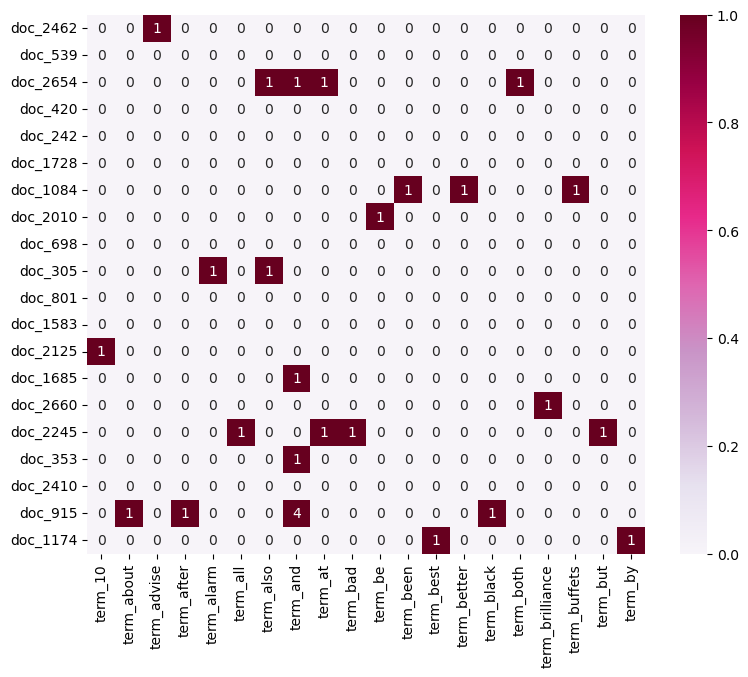

In [ ]:
# plotting the frequency using seaborn heatmap
# create a new sample and a count vectorizer of its sentence
smp_count_vect = CountVectorizer()
sentiment_smp = sentiment.sample(20)
sentiment_smp_counts = smp_count_vect.fit_transform(sentiment_smp.sentence)

# settle down the x, y, z
plot_x_samples = ["term_" + str(i) for i in smp_count_vect.get_feature_names_out()[:20]]
plot_y_samples = ["doc_" + str(i) for i in list(sentiment_smp.index)]
plot_z_samples = sentiment_smp_counts[:20,:20].toarray()

# plot
smp_plot = pd.DataFrame(plot_z_samples, columns = plot_x_samples, index = plot_y_samples)
plt.subplots(figsize=(9, 7))
smp_plot = sns.heatmap(smp_plot,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

#### 7. Reduction

Text(0, 0.5, '\nY Label')

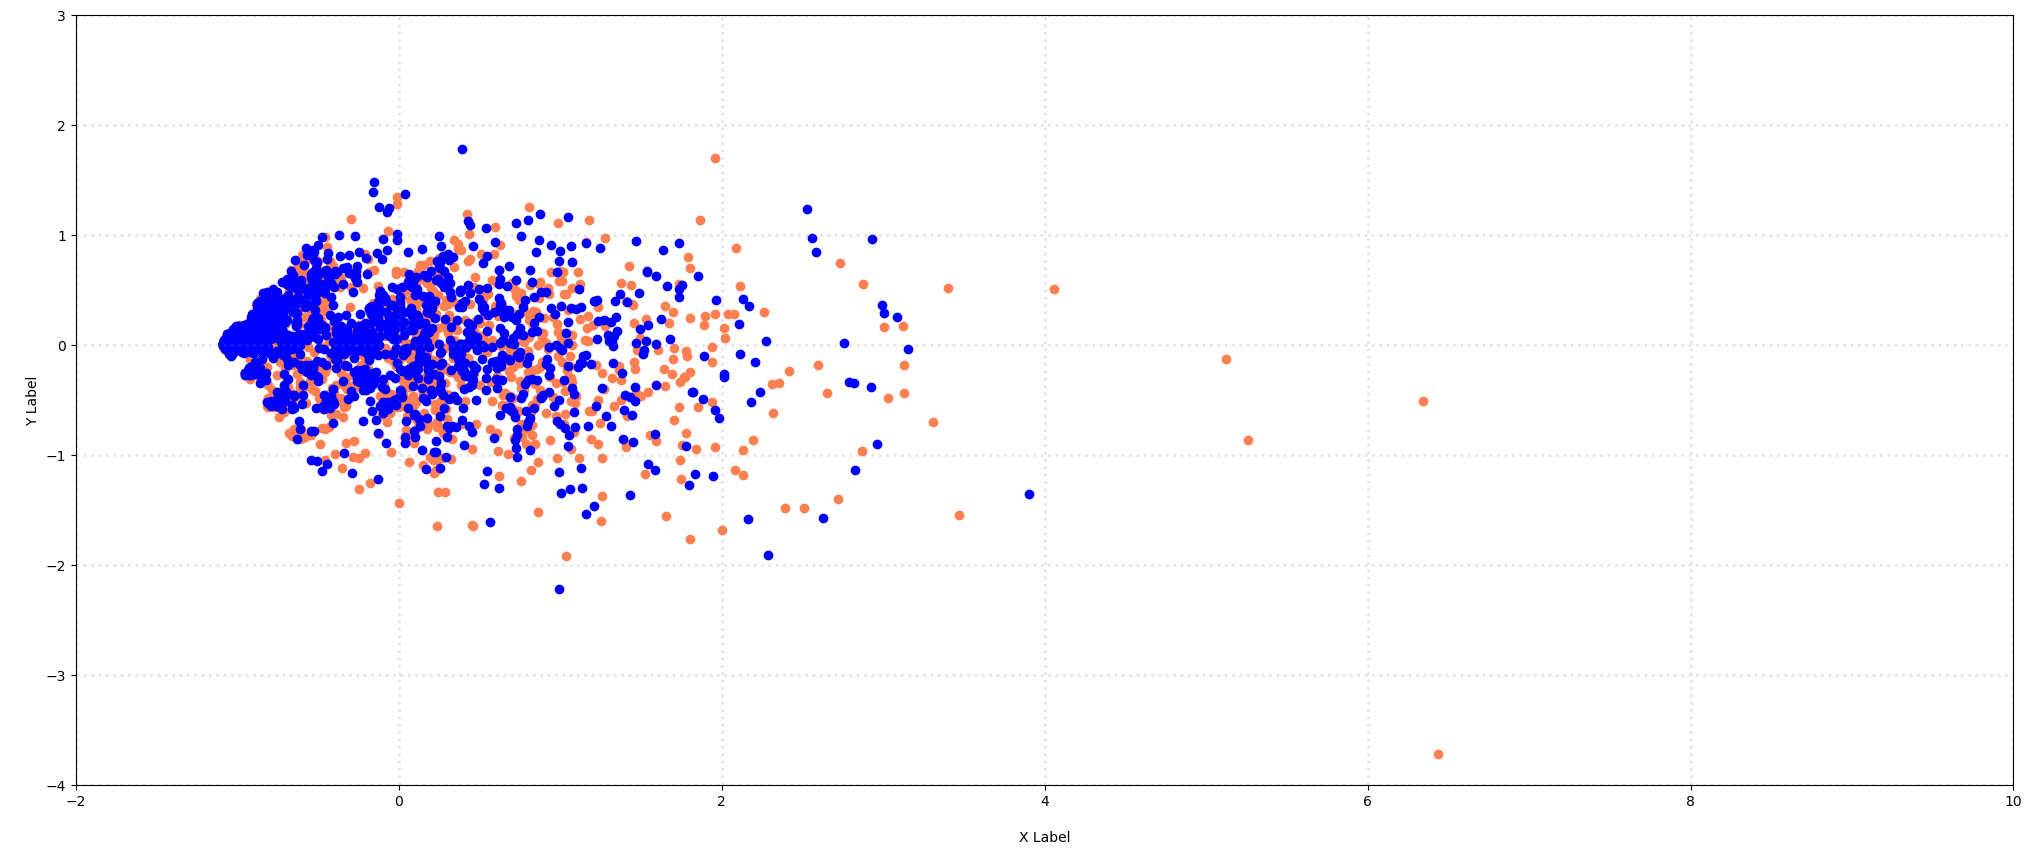

In [ ]:
# using PCA to reduce the features down to 2 features
sentiment_reduced = PCA(n_components = 2).fit_transform(sentiment_counts.toarray())
# visualize the dataset using PCA which is 2 features 
col = ['coral', 'blue', 'black']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

label_name = ['positive', 'negative']

for c, l in zip(col, label_name):
    xs = sentiment_reduced[sentiment['label'] == l].T[0]
    ys = sentiment_reduced[sentiment['label'] == l].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlim([-2, 10])
ax.set_ylim([-4, 3])
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

C:\Users\user\AppData\Local\Temp\ipykernel_18980\1862193515.py:7: MatplotlibDeprecationWarning:

Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.



Text(0.5, 0, '\nZ Label')

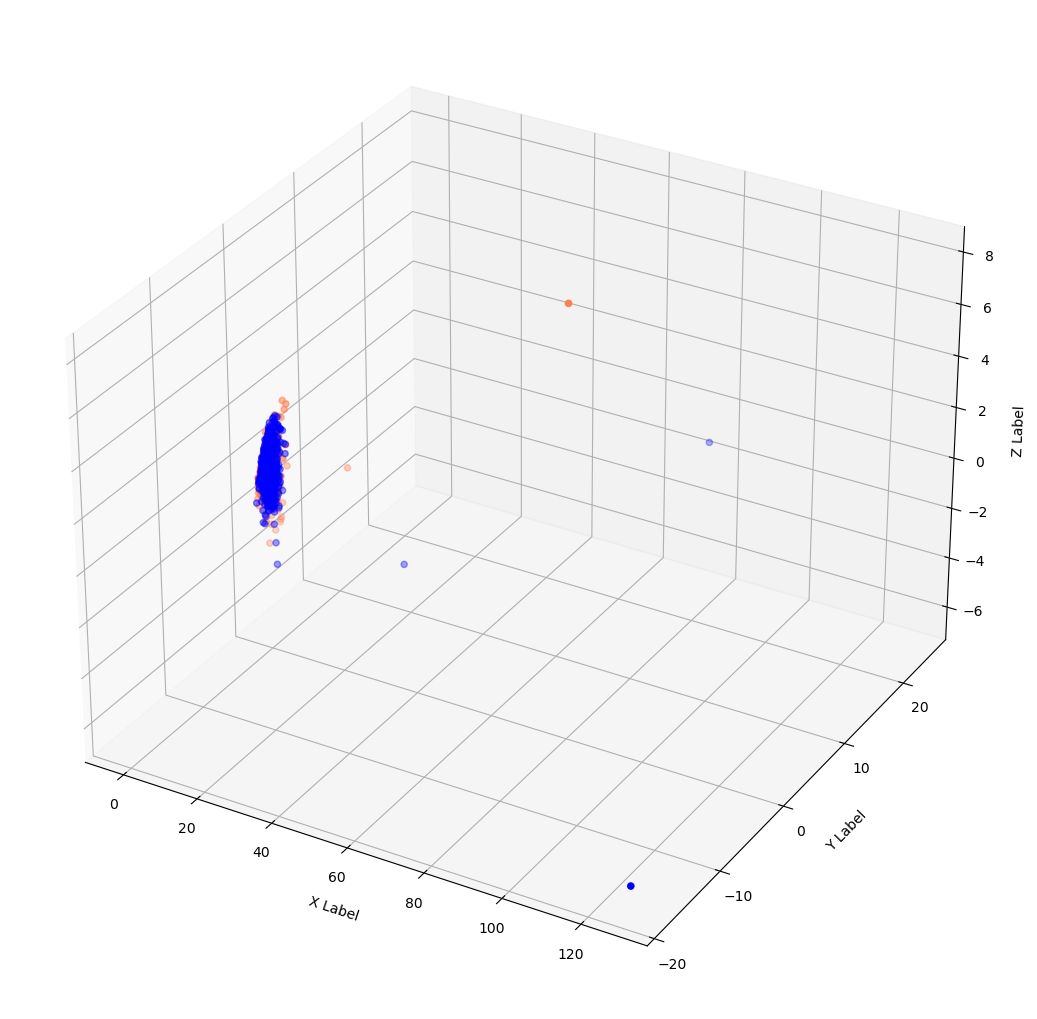

In [ ]:
sentiment_reduced_3 = PCA(n_components = 3).fit_transform(sentiment_counts.toarray())
col = ['coral', 'blue', 'magenta']

# plot
# angle 1
fig = plt.figure(figsize = (25,10))
ax = Axes3D(fig)

for c, l in zip(col, label_name):
    # c means color
    # filter the category
    # T transpose and pick up x, y, z points
    xs = sentiment_reduced_3[sentiment.label == l].T[0]
    ys = sentiment_reduced_3[sentiment.label == l].T[1]
    zs = sentiment_reduced_3[sentiment.label == l].T[2]
   
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

C:\Users\user\AppData\Local\Temp\ipykernel_18980\505087174.py:7: MatplotlibDeprecationWarning:

Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.



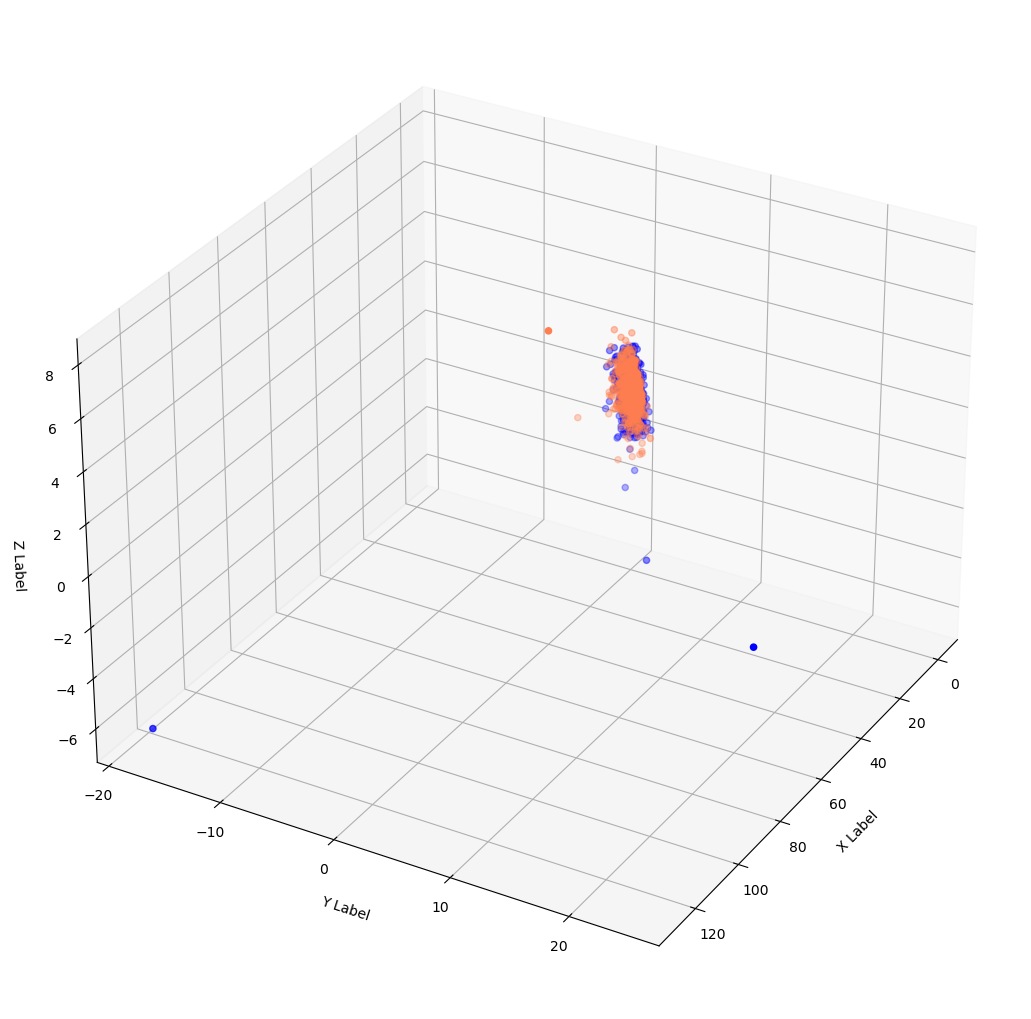

In [ ]:
sentiment_reduced_3 = PCA(n_components = 3).fit_transform(sentiment_counts.toarray())
col = ['coral', 'blue', 'magenta']

# plot
# angle 2
fig = plt.figure(figsize = (25,10))
ax = Axes3D(fig)

for c, l in zip(col, label_name):
    # c means color
    # filter the category
    # T transpose and pick up x, y, z points
    xs = sentiment_reduced_3[sentiment.label == l].T[0]
    ys = sentiment_reduced_3[sentiment.label == l].T[1]
    zs = sentiment_reduced_3[sentiment.label == l].T[2]
   
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
ax.view_init(30, 30)

C:\Users\user\AppData\Local\Temp\ipykernel_18980\2173850441.py:7: MatplotlibDeprecationWarning:

Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.



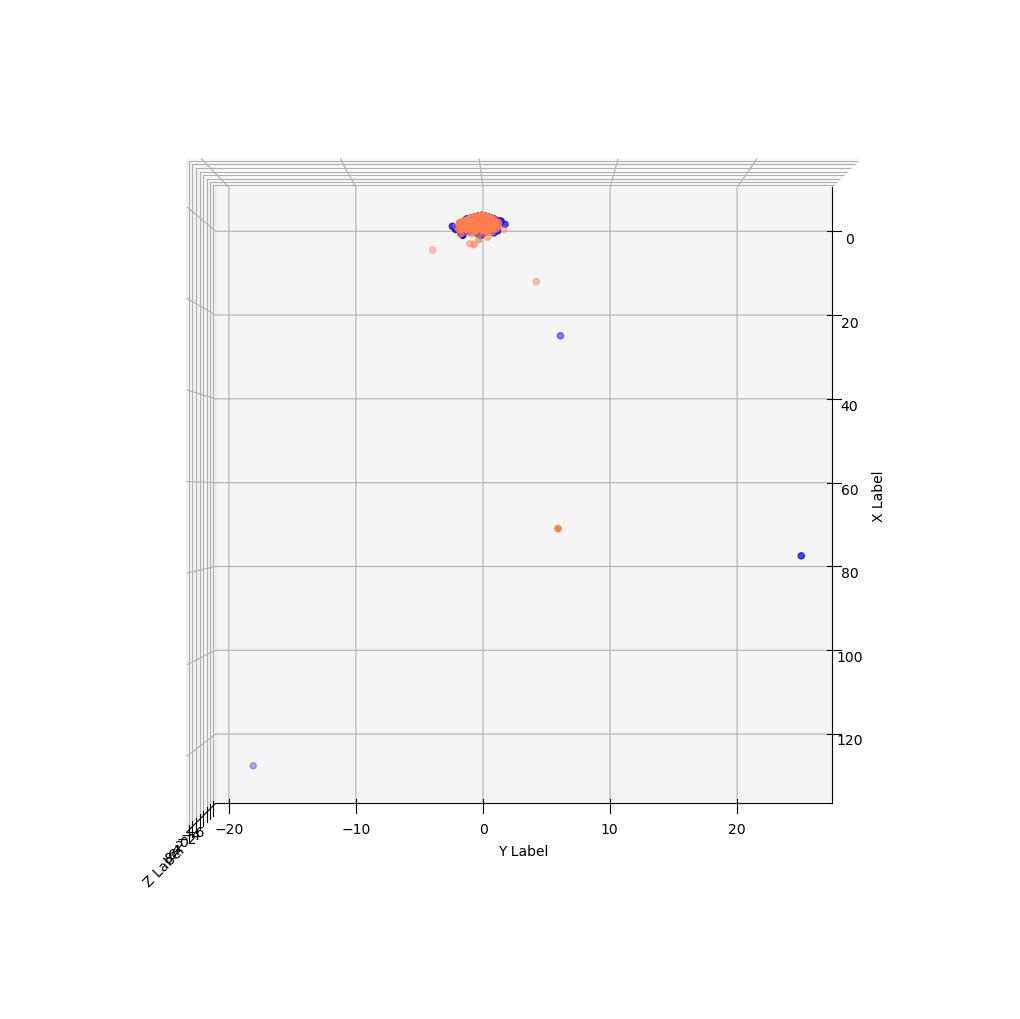

In [ ]:
sentiment_reduced_3 = PCA(n_components = 3).fit_transform(sentiment_counts.toarray())
col = ['coral', 'blue', 'magenta']

# plot
# angle 3
fig = plt.figure(figsize = (25,10))
ax = Axes3D(fig)

for c, l in zip(col, label_name):
    # c means color
    # filter the category
    # T transpose and pick up x, y, z points
    xs = sentiment_reduced_3[sentiment.label == l].T[0]
    ys = sentiment_reduced_3[sentiment.label == l].T[1]
    zs = sentiment_reduced_3[sentiment.label == l].T[2]
   
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
ax.view_init(90, 0)

#### 8. Attribute Transformation / Aggregation

In [ ]:
# using Ploty to visualize
term_frequencies = np.asarray(sentiment_counts.sum(axis=0))[0]

In [ ]:
len(term_frequencies)

5153

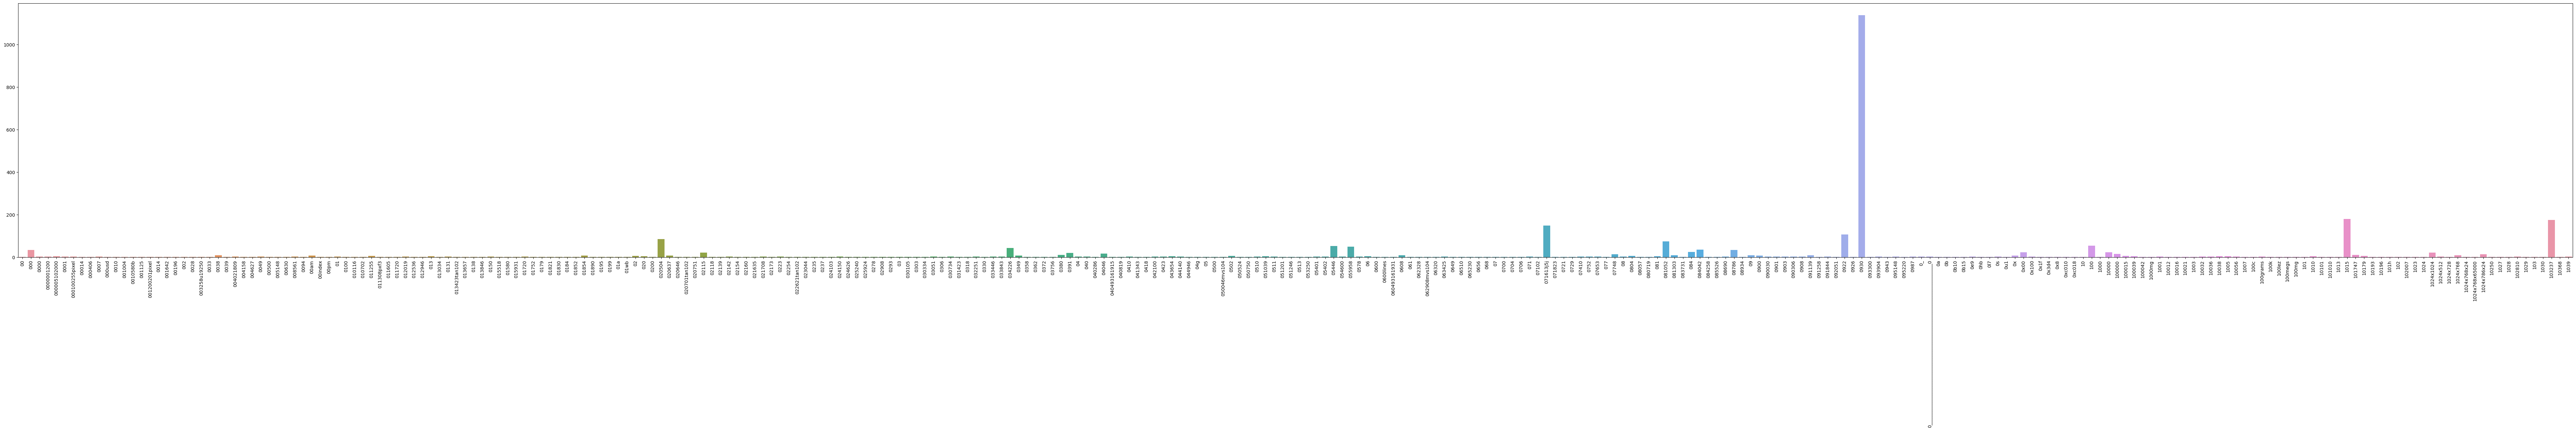

In [ ]:
# show the first 300 terms' frequency
term_frequencies = np.asarray(sentiment_counts.sum(axis=0))[0]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

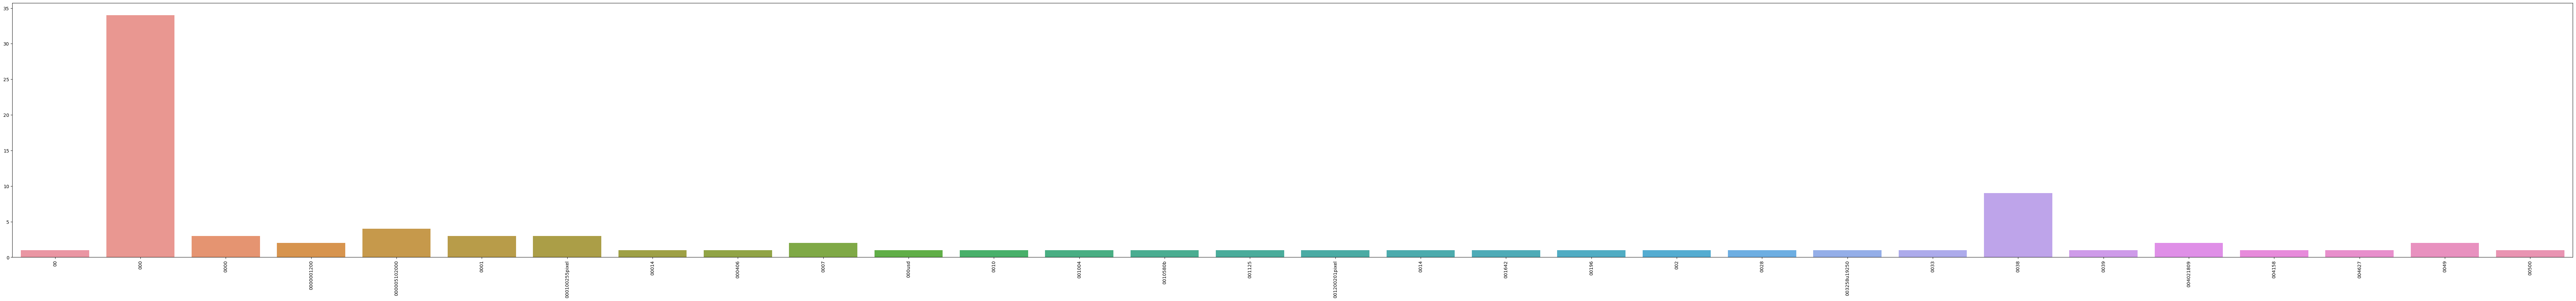

In [ ]:
# plot a bar chart for the term frequencies
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:30], 
            y=term_frequencies[:30])
g.set_xticklabels(count_vect.get_feature_names_out()[:30], rotation = 90);

In [ ]:
# using a nicer interactive visualization plot
import plotly.express as px
px.bar(x=count_vect.get_feature_names()[:30], y=term_frequencies[:30])

c:\Users\user\.conda\envs\default\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [ ]:
s_long_tail = pd.DataFrame(
    list(zip(count_vect.get_feature_names_out(), list(term_frequencies))),
    columns=["term_name", "term_frequencies"]
)
s_long_tail.sort_values(by=["term_frequencies"], ascending=False, inplace=True)

# show top 100
px.bar(s_long_tail[:100], x="term_name", y="term_frequencies")

In [ ]:
import math

[Text(0, 0, 'and'),
 Text(1, 0, 'are'),
 Text(2, 0, 'as'),
 Text(3, 0, 'all'),
 Text(4, 0, 'an'),
 Text(5, 0, 'about'),
 Text(6, 0, 'also'),
 Text(7, 0, 'any'),
 Text(8, 0, 'after'),
 Text(9, 0, 'again'),
 Text(10, 0, 'acting'),
 Text(11, 0, 'am'),
 Text(12, 0, '10'),
 Text(13, 0, 'amazing'),
 Text(14, 0, 'always'),
 Text(15, 0, 'anyone'),
 Text(16, 0, 'another'),
 Text(17, 0, 'absolutely'),
 Text(18, 0, 'around'),
 Text(19, 0, 'actors'),
 Text(20, 0, 'actually'),
 Text(21, 0, 'anything'),
 Text(22, 0, 'almost'),
 Text(23, 0, 'art'),
 Text(24, 0, 'actor'),
 Text(25, 0, 'area'),
 Text(26, 0, '20'),
 Text(27, 0, 'ago'),
 Text(28, 0, 'amazon'),
 Text(29, 0, 'although'),
 Text(30, 0, 'amount'),
 Text(31, 0, 'arrived'),
 Text(32, 0, '30'),
 Text(33, 0, '90'),
 Text(34, 0, 'above'),
 Text(35, 0, 'action'),
 Text(36, 0, 'ambiance'),
 Text(37, 0, 'annoying'),
 Text(38, 0, 'adorable'),
 Text(39, 0, '40'),
 Text(40, 0, 'ability'),
 Text(41, 0, 'along'),
 Text(42, 0, 'anytime'),
 Text(43, 0, 'are

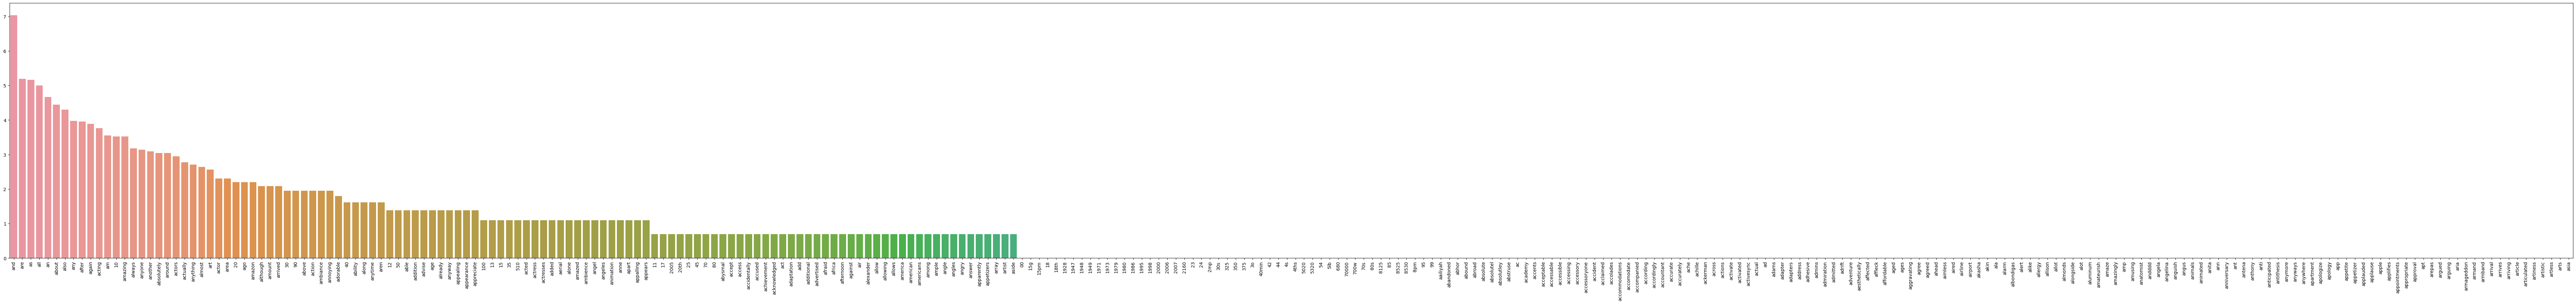

In [ ]:
# visualize the Sorted Frequency in log scale
count_vect = CountVectorizer()
sentiment_counts = count_vect.fit_transform(sentiment.sentence)

word = count_vect.get_feature_names_out()[:300]
term_frequencies_log = [math.log(i) for i in term_frequencies]
x = zip(word, term_frequencies_log)
x = sorted(x, key = lambda s :s[1], reverse=True)
new_word = []
sort_freq_log = []
for i, freq in x:
    new_word.append(i)
    sort_freq_log.append(float(freq))
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=new_word, y=sort_freq_log)
g.set_xticklabels(new_word, rotation = 90)

In [ ]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(sentiment.score)
sentiment['bin_label'] = mlb.transform(sentiment['score']).tolist()
sentiment[0:9]

,sentence,score,label,category_name,category,unigrams,bin_label
0,So there is no way for me to plug it in here i...,0,negative,amazon,0,"[So, there, is, no, way, for, me, to, plug, it...",[0]
1,"Good case, Excellent value.",1,positive,amazon,0,"[Good, case, ,, Excellent, value, .]",[1]
2,Great for the jawbone.,1,positive,amazon,0,"[Great, for, the, jawbone, .]",[1]
3,Tied to charger for conversations lasting more...,0,negative,amazon,0,"[Tied, to, charger, for, conversations, lastin...",[0]
4,The mic is great.,1,positive,amazon,0,"[The, mic, is, great, .]",[1]
5,I have to jiggle the plug to get it to line up...,0,negative,amazon,0,"[I, have, to, jiggle, the, plug, to, get, it, ...",[0]
6,If you have several dozen or several hundred c...,0,negative,amazon,0,"[If, you, have, several, dozen, or, several, h...",[0]
7,If you are Razr owner...you must have this!,1,positive,amazon,0,"[If, you, are, Razr, owner, ..., you, must, ha...",[1]
8,"Needless to say, I wasted my money.",0,negative,amazon,0,"[Needless, to, say, ,, I, wasted, my, money, .]",[0]


In [ ]:
# data exploration: compare data
# We retrieve 4 sentences for a random record, here, indexed at 40, 50, 60 and 70
document_to_transform_1 = []
random_record_1 = sentiment.iloc[40]
random_record_1 = random_record_1['sentence']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = sentiment.iloc[50]
random_record_2 = random_record_2['sentence']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = sentiment.iloc[60]
random_record_3 = random_record_3['sentence']
document_to_transform_3.append(random_record_3)

document_to_transform_4 = []
random_record_4 = sentiment.iloc[70]
random_record_4 = random_record_4['sentence']
document_to_transform_4.append(random_record_4)

In [ ]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)
print(document_to_transform_4)

['I was not impressed by this product.']
['good protection and does not make phone too bulky.']
['I really recommend this faceplates since it looks very nice, elegant and cool.']
['Even in my BMW 3 series which is fairly quiet, I have trouble hearing what the other person is saying.']


In [ ]:
from sklearn.preprocessing import binarize

# transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)
document_vector_count_4 = count_vect.transform(document_to_transform_4)

# binarize vecors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)
document_vector_count_4_bin = binarize(document_vector_count_4)


# print
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())
print(document_vector_count_4.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_1_4 = cosine_similarity(document_vector_count_1, document_vector_count_4, dense_output=True)

cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)
cos_sim_count_2_4 = cosine_similarity(document_vector_count_2, document_vector_count_4, dense_output=True)
cos_sim_count_3_4 = cosine_similarity(document_vector_count_3, document_vector_count_4, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)
cos_sim_count_4_4 = cosine_similarity(document_vector_count_4, document_vector_count_4, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 1 and 4: %(x)f" %{"x":cos_sim_count_1_4})

print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})
print("Cosine Similarity using count bw 2 and 4: %(x)f" %{"x":cos_sim_count_2_4})
print("Cosine Similarity using count bw 3 and 4: %(x)f" %{"x":cos_sim_count_3_4})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})
print("Cosine Similarity using count bw 4 and 4: %(x)f" %{"x":cos_sim_count_4_4})

Cosine Similarity using count bw 1 and 2: 0.136083
Cosine Similarity using count bw 1 and 3: 0.117851
Cosine Similarity using count bw 1 and 4: 0.000000
Cosine Similarity using count bw 2 and 3: 0.096225
Cosine Similarity using count bw 2 and 4: 0.000000
Cosine Similarity using count bw 3 and 4: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000
Cosine Similarity using count bw 4 and 4: 1.000000


### Third Part

#### 1. Visualization

In [ ]:
sentiment

,sentence,score,label,category_name,category,unigrams,bin_label
0,So there is no way for me to plug it in here i...,0,negative,amazon,0,"[So, there, is, no, way, for, me, to, plug, it...",[0]
1,"Good case, Excellent value.",1,positive,amazon,0,"[Good, case, ,, Excellent, value, .]",[1]
2,Great for the jawbone.,1,positive,amazon,0,"[Great, for, the, jawbone, .]",[1]
3,Tied to charger for conversations lasting more...,0,negative,amazon,0,"[Tied, to, charger, for, conversations, lastin...",[0]
4,The mic is great.,1,positive,amazon,0,"[The, mic, is, great, .]",[1]
...,...,...,...,...,...,...,...
2709,I just got bored watching Jessice Lange take h...,0,negative,imdb,2,"[I, just, got, bored, watching, Jessice, Lange...",[0]
2710,"Unfortunately, any virtue in this film's produ...",0,negative,imdb,2,"[Unfortunately, ,, any, virtue, in, this, film...",[0]
2711,"In a word, it is embarrassing.",0,negative,imdb,2,"[In, a, word, ,, it, is, embarrassing, .]",[0]
2712,Exceptionally bad!,0,negative,imdb,2,"[Exceptionally, bad, !]",[0]


In [ ]:
# sort the freqency
sort_count = [i/sum(sort_freq_log) for i in sort_freq_log]
df = pd.DataFrame()
df['name'] = np.array(new_word)
df['count'] = np.array(sort_count)
df.set_index('name', inplace=True)
df[:10]

,count
name,
and,0.035706
are,0.026349
as,0.026206
all,0.025356
an,0.023662
about,0.022542
also,0.021839
any,0.020145
after,0.020049


In [ ]:
from wordcloud import WordCloud

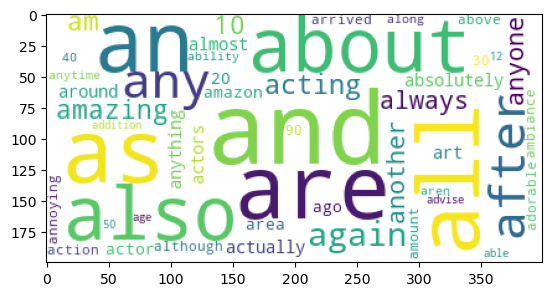

In [ ]:
# using the WordCloud to plot the term frequency
Cloud_freq = WordCloud(background_color="white", max_words=50).generate_from_frequencies(df['count'])
plt.imshow(Cloud_freq)

#### 2. TF-IDF

In [ ]:
count_vect = CountVectorizer()
sentiment_counts = count_vect.fit_transform(sentiment.sentence)
word = count_vect.get_feature_names_out()

words = {}
for i in range(len(word)):
    words[i]=word[i]
tf = pd.DataFrame(sentiment_counts.toarray())
tf = tf.rename(words,axis = 1)
tf.loc['count']=tf.sum(axis = 0)

tf_sort = pd.DataFrame(tf.loc['count'])
tf_sort.sort_values(by = 'count',ascending=False,inplace = True)
tf_sort = tf_sort.apply(lambda x :x/tf_sort['count'].sum())
tf_sort

,count
the,0.058061
and,0.033901
it,0.023505
is,0.022343
to,0.019900
...,...
hoot,0.000030
hoped,0.000030
hopeless,0.000030
hopes,0.000030


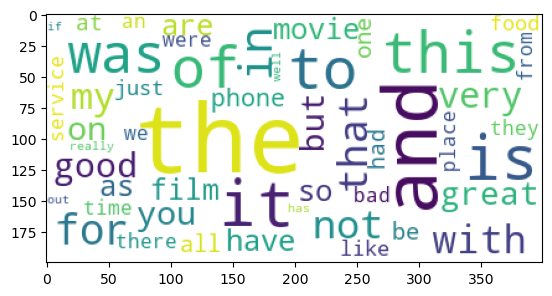

In [ ]:
# plot the WordCloud with TF
Cloud = WordCloud(background_color="white", max_words=50).generate_from_frequencies(tf_sort['count'])
plt.imshow(Cloud)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

In [ ]:
# create the TF-IDF dataset
transformer = TfidfTransformer()
tfidf = transformer.fit_transform(sentiment_counts)
tfidf = pd.DataFrame(tfidf.toarray())
tfidf = tfidf.rename(words,axis = 1)
tfidf_sort = pd.DataFrame(tfidf.mean(axis=0),word)
tfidf_sort.columns=['tfidf']
tfidf_sort.sort_values(by='tfidf',ascending=False,inplace = True)
tfidf_sort[0:10]

,tfidf
the,0.059746
and,0.041102
it,0.038508
is,0.035705
this,0.032354
was,0.032123
to,0.029216
of,0.025630
not,0.020651
very,0.020308


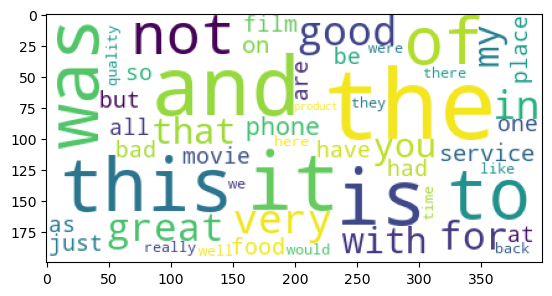

In [ ]:
# plot the WordCloud with TF-IDF
Cloud2 = WordCloud(background_color="white", max_words=50).generate_from_frequencies(tfidf_sort['tfidf'])
plt.imshow(Cloud2)

#### 3. Naive Bayes classifier

In [ ]:
# create TF transformer
transformer_tf = TfidfTransformer(use_idf=False).fit(sentiment_counts)
Y_tf = transformer_tf.transform(sentiment_counts)
Y_tf.shape

(2714, 5153)

In [ ]:
# create TF-IDF transformer
transformer_tfidf = TfidfTransformer()
Y_tfidf = transformer_tfidf.fit_transform(sentiment_counts)
Y_tfidf.shape

(2714, 5153)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
#Create TF Classifier
#Create TF-IDF Classifier
classifier_tf = MultinomialNB().fit(Y_tf, sentiment.score)
classifier_tfidf = MultinomialNB().fit(Y_tfidf, sentiment.score)

In [ ]:
sentiment_smp = sentiment.sample(1000)
sentiment_smp_counts = count_vect.transform(sentiment_smp.sentence)
sentiment_smp_counts.shape

(1000, 5153)

In [ ]:
Y_test_tf = transformer_tf.transform(sentiment_smp_counts)
print(Y_test_tf.shape)
Y_test_tfidf = transformer_tfidf.transform(sentiment_smp_counts)
print(Y_test_tfidf.shape)

(1000, 5153)
(1000, 5153)


In [ ]:
# predict the result
tf_predicted = classifier_tf.predict(Y_test_tf)
tfidf_predicted = classifier_tfidf.predict(Y_test_tfidf)

In [ ]:
# accuracy
tf_acc = np.mean(tf_predicted == sentiment_smp.score)
tfidf_acc = np.mean(tfidf_predicted == sentiment_smp.score)

In [ ]:
# create a TF matrix and recall
tf_matrix = pd.DataFrame(metrics.confusion_matrix(sentiment_smp.score, tf_predicted))
tf_matrix.rename({0:'True negative',1:'True positive'},axis = 0 ,inplace = True)
tf_matrix.rename({0:'Predict negative',1:'Predict positive'},axis = 1 ,inplace = True)

TP = tf_matrix['Predict negative'][0]
FN = tf_matrix['Predict positive'][0]
tf_Recall = np.round(TP/(TP+FN), 3)

print('Confusion matrix of TF classifer')
print(f"Accuracy of TF classifier is {tf_acc}")
print(f"Recall   of TF classifier is {tf_Recall}")
tf_matrix

Confusion matrix of TF classifer
Accuracy of TF classifier is 0.932
Recall   of TF classifier is 0.927


,Predict negative,Predict positive
True negative,481,38
True positive,30,451


In [ ]:
# create a TF-IDF matrix and recall
tfidf_matrix = pd.DataFrame(metrics.confusion_matrix(sentiment_smp.score, tfidf_predicted))
tfidf_matrix.rename({0:'True negative',1:'True positive'},axis = 0 ,inplace = True)
tfidf_matrix.rename({0:'Predict negative',1:'Predict positive'},axis = 1 ,inplace = True)

TP = tfidf_matrix['Predict negative'][0]
FN = tfidf_matrix['Predict positive'][0]
tfidf_Recall = np.round(TP/(TP+FN), 3)

print('Confusion matrix of TF-IDF classifer')
print(f"Accuracy of TF-IDF classifier is {tfidf_acc}")
print(f"Recall   of TF-IDF classifier is {tfidf_Recall}")
tfidf_matrix

Confusion matrix of TF-IDF classifer
Accuracy of TF-IDF classifier is 0.959
Recall   of TF-IDF classifier is 0.958


,Predict negative,Predict positive
True negative,497,22
True positive,19,462


### Fourth Part

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# delete the stop words using nltk
sentiment['sentence'] = sentiment['sentence'].str.lower()
sentiment_new = sentiment.drop(['sentence'], axis=1)

new = dmh.tokenize_text_stopwords(sentiment.sentence)

sentiment_new['sentence'] = new
column = list(sentiment.columns)
sentiment_new = sentiment_new[column]
sentiment_new[:10]

,sentence,score,label,category_name,category,unigrams,bin_label
0,way plug us unless go converter .,0,negative,amazon,0,"[So, there, is, no, way, for, me, to, plug, it...",[0]
1,"good case , excellent value .",1,positive,amazon,0,"[Good, case, ,, Excellent, value, .]",[1]
2,great jawbone .,1,positive,amazon,0,"[Great, for, the, jawbone, .]",[1]
3,tied charger conversations lasting 45 minutes....,0,negative,amazon,0,"[Tied, to, charger, for, conversations, lastin...",[0]
4,mic great .,1,positive,amazon,0,"[The, mic, is, great, .]",[1]
5,jiggle plug get line right get decent volume .,0,negative,amazon,0,"[I, have, to, jiggle, the, plug, to, get, it, ...",[0]
6,"several dozen several hundred contacts , imagi...",0,negative,amazon,0,"[If, you, have, several, dozen, or, several, h...",[0]
7,razr owner ... must !,1,positive,amazon,0,"[If, you, are, Razr, owner, ..., you, must, ha...",[1]
8,"needless say , wasted money .",0,negative,amazon,0,"[Needless, to, say, ,, I, wasted, my, money, .]",[0]
9,waste money time ! .,0,negative,amazon,0,"[What, a, waste, of, money, and, time, !, .]",[0]


In [ ]:
sentiment.shape

(2714, 7)

In [ ]:
count_vect = CountVectorizer()
sentiment_new_counts = count_vect.fit_transform(sentiment_new.sentence)

In [ ]:
# create a new classifier
transformer_tf = TfidfTransformer(use_idf=False).fit(sentiment_new_counts)
Y_tf = transformer_tf.transform(sentiment_new_counts)
Y_tf.shape

(2714, 5056)

In [ ]:
transformer_tfidf = TfidfTransformer()
Y_tfidf = transformer_tfidf.fit_transform(sentiment_new_counts)
Y_tfidf.shape

(2714, 5056)

In [ ]:
classifier_tf = MultinomialNB().fit(Y_tf, sentiment_new.score)
classifier_tfidf = MultinomialNB().fit(Y_tfidf, sentiment_new.score)

In [ ]:
Y_test = sentiment_new.sample(n=1000, random_state=49)
Y_test.shape

(1000, 7)

In [ ]:
Y_test_counts = count_vect.transform(Y_test.sentence)
Y_test_counts.shape

(1000, 5056)

In [ ]:
Y_test_new_tf = transformer_tf.transform(Y_test_counts)
print(Y_test_new_tf.shape)
Y_test_new_tfidf = transformer_tfidf.transform(Y_test_counts)
print(Y_test_new_tfidf.shape)

(1000, 5056)
(1000, 5056)


In [ ]:
tf_new_predicted = classifier_tf.predict(Y_test_new_tf)
tfidf_new_predicted = classifier_tfidf.predict(Y_test_new_tfidf)

In [ ]:
tf_new_acc = np.mean(tf_new_predicted == Y_test.score)
tfidf_new_acc = np.mean(tfidf_new_predicted == Y_test.score)

In [ ]:
tf_matrix = pd.DataFrame(metrics.confusion_matrix(Y_test.score, tf_new_predicted))
tf_matrix.rename({0:'True negative',1:'True positive'},axis = 0 ,inplace = True)
tf_matrix.rename({0:'Predict negative',1:'Predict positive'},axis = 1 ,inplace = True)

TP = tf_matrix['Predict negative'][0]
FN = tf_matrix['Predict positive'][0]
tf_Recall = np.round(TP/(TP+FN), 3)

print('Confusion matrix of TF classifer')
print(f"Accuracy of TF classifier is {tf_new_acc}")
print(f"Recall   of TF classifier is {tf_Recall}")
tf_matrix

Confusion matrix of TF classifer
Accuracy of TF classifier is 0.943
Recall   of TF classifier is 0.931


,Predict negative,Predict positive
True negative,456,34
True positive,23,487


In [ ]:
tfidf_matrix = pd.DataFrame(metrics.confusion_matrix(Y_test.score, tfidf_new_predicted))
tfidf_matrix.rename({0:'True negative',1:'True positive'},axis = 0 ,inplace = True)
tfidf_matrix.rename({0:'Predict negative',1:'Predict positive'},axis = 1 ,inplace = True)

TP = tfidf_matrix['Predict negative'][0]
FN = tfidf_matrix['Predict positive'][0]
tfidf_Recall = np.round(TP/(TP+FN), 3)

print('Confusion matrix of TF-IDF classifer')
print(f"Accuracy of TF-IDF classifier is {tfidf_new_acc}")
print(f"Recall   of TF-IDF classifier is {tfidf_Recall}")
tfidf_matrix

Confusion matrix of TF-IDF classifer
Accuracy of TF-IDF classifier is 0.955
Recall   of TF-IDF classifier is 0.947


,Predict negative,Predict positive
True negative,464,26
True positive,19,491


### Fifth Part